# S04 T01: Transformació Registre Log amb Regular expressions
## Nivell 1
### Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_table('Web_access_log-akumenius.com.txt')

In [3]:
df.head()

,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...


**Partes de un common log format**


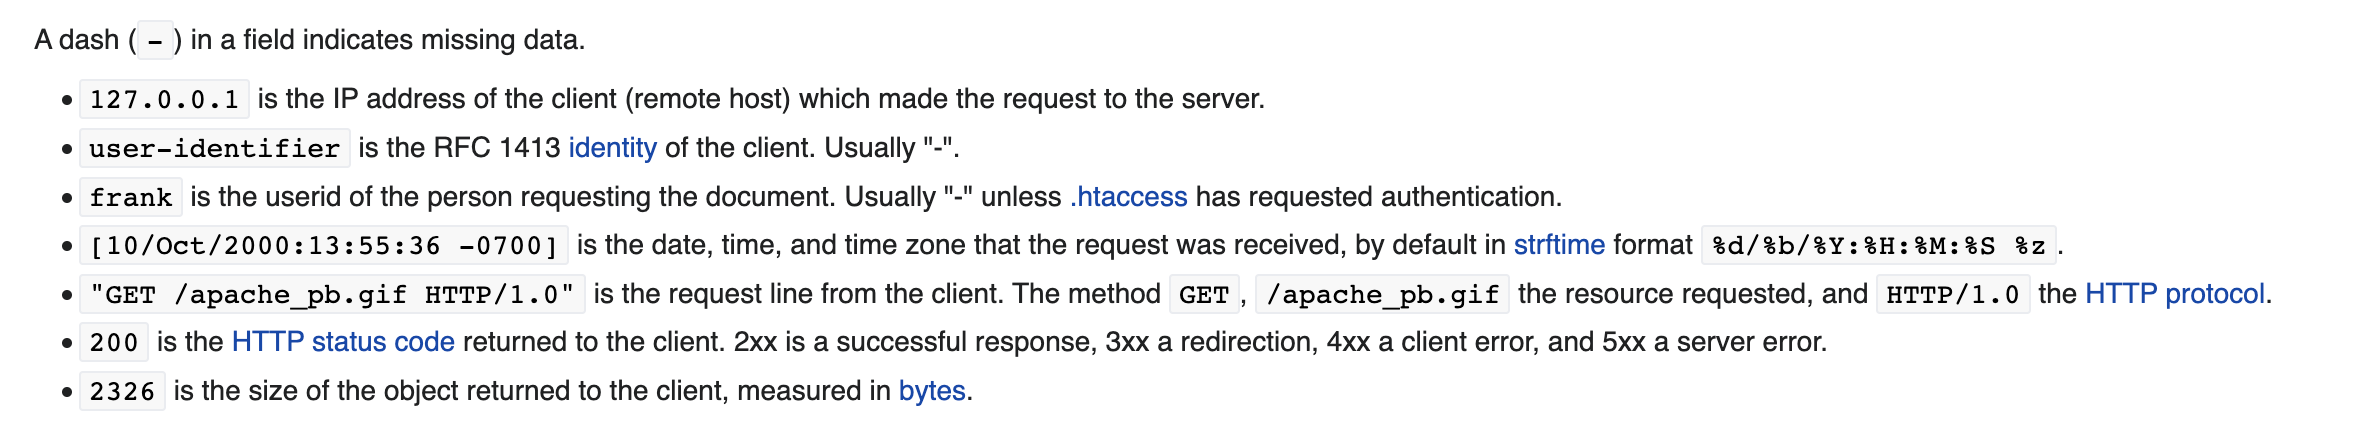

In [4]:
#saco el encabezado
df = pd.read_table('Web_access_log-akumenius.com.txt', header=None)
df

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
...,...
261868,www.akumenius.com 5.255.253.53 - - [02/Mar/201...
261869,www.akumenius.com 74.86.158.107 - - [02/Mar/20...
261870,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...
261871,localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 ...


## Nivell 2
### Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

Separo la columna en cada una de las partes. 
Fuente usada para hacerlo: [LINK](https://mmas.github.io/read-apache-access-log-pandas)

In [5]:
df = pd.read_table(
    'Web_access_log-akumenius.com.txt',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 1, 4, 5, 6, 7, 8, 9],
    names=['Host','ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'])
df

,Host,ip,time,request,status,size,referer,user_agent
0,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,[02/Mar/2014:03:05:39 +0100],"""GET / HTTP/1.1""",200,7528.0,"""-""","""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
261869,www.akumenius.com,74.86.158.107,[02/Mar/2014:03:09:52 +0100],"""HEAD / HTTP/1.1""",200,NaN,"""-""","""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt..."
261870,localhost,127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""
261871,localhost,127.0.0.1,[02/Mar/2014:03:10:18 +0100],"""OPTIONS * HTTP/1.0""",200,NaN,"""-""","""Apache (internal dummy connection)"""


**Partes del cuadro**
- 1º Host: dirección desde donde se hace la petición 

- 2º IP: del cliente que hace la petición.

- 3º time: datos de fecha y hora en la que se recibe el requerimiento, con el formato DD-MES-AAAA:HH:MM timezone 

- 4º request: item compuesto por 3 elementos: El primero es una palabra en mayúsculas y es el método de inicio de sesión que utiliza el cliente. El segundo elemento representa el recurso solicitado por el usuario, y la tercera parte representa el tipo de protocolo utilizado para realizar la solicitud.

- 5º status: código que se le responde al cliente.
 - Si comienzo con 2 significa respuesta exitosa.
 - Si comienzo con 3 significa que es direccionado.
 - Si comienzo con 4 significa error del costado cliente. 
 - Si comienzo con 5 significa error del costado servidor.

- 6º size: tamaño del objeto entregado al cliente. Puede ser un número de bytes o un símbolo de guión cuando no se devuelve nada.

- 9º referer: representa el referente. Es el nombre de un campo de encabezado HTTP opcional que identifica la dirección de la página web (es decir, URI o IRI) desde la que se realiza la solicitud. Al verificar el campo de referencia, el servidor del nuevo sitio web puede determinar desde dónde se originó la solicitud.

- 10º user_agent: informa sobre el navegador utilizado por el cliente

In [6]:
df.dtypes 

Host           object
ip             object
time           object
request        object
status          int64
size          float64
referer        object
user_agent     object
dtype: object

In [7]:
#Limpio los caracteres especiales de las columnas

df['time'] = df['time'].map(lambda x : x.lstrip('[').rstrip(']'))
df['request'] = df['request'].map(lambda x : x.lstrip('"').rstrip('"'))
df['referer'] = df['referer'].map(lambda x : x.lstrip('"').rstrip('"'))
df['user_agent'] = df['user_agent'].map(lambda x : x.lstrip('"').rstrip('"'))

df
     

,Host,ip,time,request,status,size,referer,user_agent
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,02/Mar/2014:03:05:39 +0100,GET / HTTP/1.1,200,7528.0,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,02/Mar/2014:03:09:52 +0100,HEAD / HTTP/1.1,200,NaN,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
261871,localhost,127.0.0.1,02/Mar/2014:03:10:18 +0100,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)


In [8]:
#Pasar la columna time a formato fecha (datetime)

from datetime import datetime
import pytz

df['time'] = pd.to_datetime(df['time'], format='%d/%b/%Y:%H:%M:%S %z')

df

,Host,ip,time,request,status,size,referer,user_agent
0,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,2014-02-23 03:10:31+01:00,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,2014-03-02 03:05:39+01:00,GET / HTTP/1.1,200,7528.0,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
261869,www.akumenius.com,74.86.158.107,2014-03-02 03:09:52+01:00,HEAD / HTTP/1.1,200,NaN,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...
261870,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)
261871,localhost,127.0.0.1,2014-03-02 03:10:18+01:00,OPTIONS * HTTP/1.0,200,NaN,-,Apache (internal dummy connection)


In [9]:
df.dtypes

Host                                        object
ip                                          object
time          datetime64[ns, pytz.FixedOffset(60)]
request                                     object
status                                       int64
size                                       float64
referer                                     object
user_agent                                  object
dtype: object

In [10]:
df.nunique()

Host               5
ip              2921
time          118735
request        66764
status            12
size           15547
referer         2507
user_agent       735
dtype: int64

### Exercici 3
Geolocalitza les IP's.

In [11]:
#creo un DF nuevo con las ip
dGeo = pd.DataFrame()
dGeo['ip'] = df['ip']

dGeo

,ip
0,127.0.0.1
1,127.0.0.1
2,127.0.0.1
3,127.0.0.1
4,127.0.0.1
...,...
261868,5.255.253.53
261869,74.86.158.107
261870,127.0.0.1
261871,127.0.0.1


In [12]:
dGeo.dtypes

ip    object
dtype: object

In [13]:
#Instalo la libreria geolite2

!pip install maxminddb-geolite2

Agrupo los ip iguales contando cuantos ip diferentes hay y cuantas veces se repite cada ip

In [14]:
dGeoAgr = dGeo['ip'].value_counts().rename_axis('ip').reset_index(name = 'N. entradas')

dGeoAgr

,ip,N. entradas
0,66.249.76.216,46382
1,80.28.221.123,14725
2,127.0.0.1,13892
3,217.125.71.222,5201
4,66.249.75.148,3558
...,...,...
2916,84.123.150.27,1
2917,217.130.150.116,1
2918,202.46.52.23,1
2919,216.151.130.170,1


In [15]:
#Elimino el ip de local host

dGeoAgr = dGeoAgr.drop(dGeoAgr[dGeoAgr.ip == "127.0.0.1"].index)

dGeoAgr

,ip,N. entradas
0,66.249.76.216,46382
1,80.28.221.123,14725
3,217.125.71.222,5201
4,66.249.75.148,3558
5,162.243.192.191,2927
...,...,...
2916,84.123.150.27,1
2917,217.130.150.116,1
2918,202.46.52.23,1
2919,216.151.130.170,1


Fuente del código para geolocalización [LINK](https://stackoverflow.com/questions/10339351/how-can-i-geolocate-a-bunch-of-ip-addresses-with-python/57006918#57006918)

In [16]:
# importacio de librerias

import time
from geolite2 import geolite2
geo = geolite2.reader()

Fórmula para geolocalizar los países:

In [17]:
defP = dGeoAgr.loc[:50,['ip']]

def IPInfoP(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #errores de valor
        return np.nan
    try:
        return x['country']['names']['en'] if x is not None else np.nan
    except KeyError:   #errores de clave
        return np.nan

s_time = time.time()

defP['pais'] = dGeoAgr.loc[:,'ip'].apply(IPInfoP)

print(defP.head(), '\n')

#Calcular el tiempo de búsqueda en segundos
print('Tiempo:',str(time.time()-s_time)+'s \n')

#ver el type  de información
print(type(geo.get('66.249.76.216')))

                ip           pais
0    66.249.76.216  United States
1    80.28.221.123          Spain
3   217.125.71.222          Spain
4    66.249.75.148  United States
5  162.243.192.191  United States 

Tiempo: 1.4032368659973145s 

<class 'dict'>


Fórmula para geolocalizar los ciudades:

In [18]:
defC = dGeoAgr.loc[:50,['ip']]

def IPInfoC(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #errores de valor
        return np.nan
    try:
        return x['city']['names']['en'] if x is not None else np.nan
    except KeyError:   #errores de clave
        return np.nan

s_time = time.time()

defC['ciudad'] = dGeoAgr.loc[:,'ip'].apply(IPInfoC)
print(defC.head(), '\n')

#Calcular el tiempo de búsqueda
print('Tiempo:',str(time.time()-s_time)+'s \n')

#ver el type  de información
print(type(geo.get('66.249.76.216')))

                ip             ciudad
0    66.249.76.216      Mountain View
1    80.28.221.123  Torrejón de Ardoz
3   217.125.71.222            Seville
4    66.249.75.148      Mountain View
5  162.243.192.191           New York 

Tiempo: 0.745913028717041s 

<class 'dict'>


Fórmula para geolocalizar los Latitud:

In [19]:
defLat = dGeoAgr.loc[:50,['ip']]

def IPInfoLat(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #errores de valor
        return np.nan
    try:
        return x['location']['latitude'] if x is not None else np.nan
    except KeyError:   #errores de clave
        return np.nan

s_time = time.time()

defLat['latitud'] = dGeoAgr.loc[:,'ip'].apply(IPInfoLat)
print(defLat.head(), '\n')

#Calcular el tiempo de búsqueda
print('Tiempo:',str(time.time()-s_time)+'s \n')

#ver el type  de información
print(type(geo.get('66.249.76.216')))

                ip  latitud
0    66.249.76.216  37.4192
1    80.28.221.123  40.4554
3   217.125.71.222  37.3824
4    66.249.75.148  37.4192
5  162.243.192.191  40.7308 

Tiempo: 0.8317480087280273s 

<class 'dict'>


In [20]:
defLon = dGeoAgr.loc[:50,['ip']]

def IPInfoLon(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #errores de valor
        return np.nan
    try:
        return x['location']['longitude'] if x is not None else np.nan
    except KeyError:   #errores de clave
        return np.nan

s_time = time.time()

defLon['longitud'] = dGeoAgr.loc[:,'ip'].apply(IPInfoLon)
print(defLon.head(), '\n')

#Calcular el tiempo de búsqueda
print('Tiempo:',str(time.time()-s_time)+'s \n')

#ver el type  de información
print(type(geo.get('66.249.76.216')))

                ip  longitud
0    66.249.76.216 -122.0574
1    80.28.221.123   -3.4697
3   217.125.71.222   -5.9761
4    66.249.75.148 -122.0574
5  162.243.192.191  -73.9975 

Tiempo: 0.7056949138641357s 

<class 'dict'>


Creo las columnas de golocalización del DF

In [21]:
dGeoAgr['Pais']= dGeoAgr['ip'].apply(IPInfoP)
dGeoAgr['Ciudad'] = dGeoAgr['ip'].apply(IPInfoC)
dGeoAgr['Latitud'] = dGeoAgr['ip'].apply(IPInfoLat)
dGeoAgr['Longitud'] = dGeoAgr['ip'].apply(IPInfoLon)


dGeoAgr

,ip,N. entradas,Pais,Ciudad,Latitud,Longitud
0,66.249.76.216,46382,United States,Mountain View,37.4192,-122.0574
1,80.28.221.123,14725,Spain,Torrejón de Ardoz,40.4554,-3.4697
3,217.125.71.222,5201,Spain,Seville,37.3824,-5.9761
4,66.249.75.148,3558,United States,Mountain View,37.4192,-122.0574
5,162.243.192.191,2927,United States,New York,40.7308,-73.9975
...,...,...,...,...,...,...
2916,84.123.150.27,1,Spain,Gandia,38.9667,-0.1833
2917,217.130.150.116,1,Spain,NaN,40.4172,-3.6840
2918,202.46.52.23,1,China,Shenzhen,22.5333,114.1333
2919,216.151.130.170,1,United States,San Jose,37.4250,-121.9460


## Nivell 3
### Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

Geolocalización de los ip en el mapa del mundo
Fuenta [LINK](https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6)

In [22]:
pip install shapely

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


**Mapa del mundo con todas las geolocalizaciones**

[Text(0.5, 1.0, 'Geolocalización de IP')]

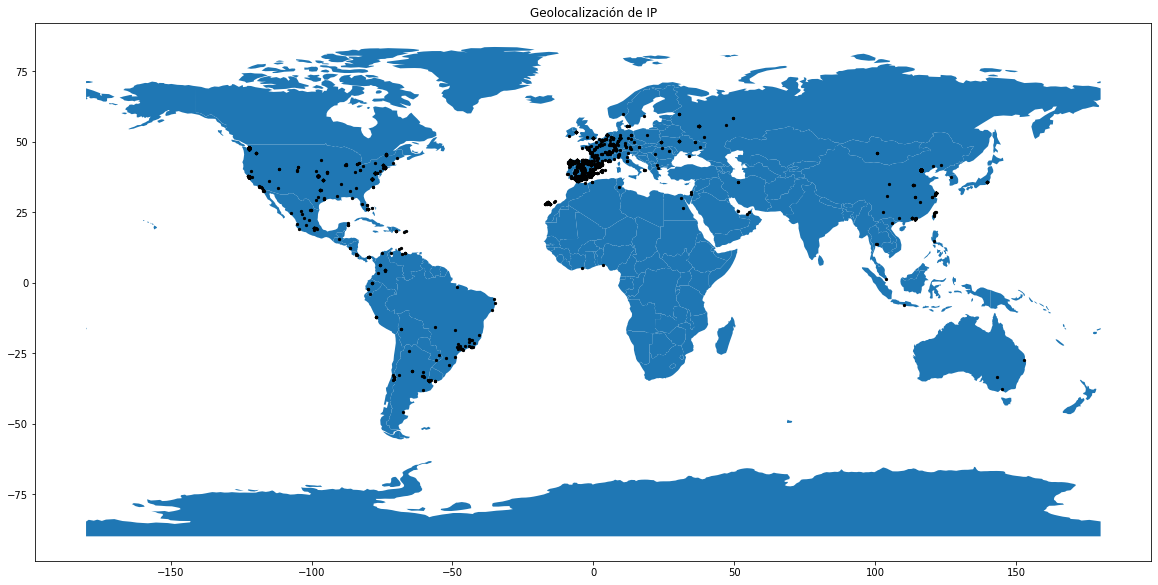

In [24]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(dGeoAgr['Longitud'], dGeoAgr['Latitud'])]
gdf = GeoDataFrame(dGeoAgr, geometry=geometry)   

#Gráfico mapa del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 20)), 
         marker='o', color='black', markersize=5).set(title='Geolocalización de IP')

Puede observarse que hay una gran concentración de las consultas en Europa, y dentro de allí particularmente España, claramente por encima del resto de las regiones. 
En menor medida, hay también una marcada demanda en el sureste brasilero (zona de San Pablo y Rio de Janiero) y en Buenos Aires (Argentina) y Santiago (Chile)

In [25]:
#Agrupo por países
paises = dGeoAgr.groupby('Pais')

#Ordeno los 20 primeros países con más entradas
paises['N. entradas'].agg(np.sum).sort_values(ascending=False).head(20)


Pais
Spain                 149174
United States          70236
China                   7010
Netherlands             6305
Germany                 2001
France                  1770
Mexico                  1244
Italy                   1042
Argentina               1007
United Kingdom           907
Brazil                   707
Russia                   670
Colombia                 526
Portugal                 422
Chile                    357
Ecuador                  323
Uruguay                  242
Austria                  224
Dominican Republic       174
Andorra                  173
Name: N. entradas, dtype: int64

Comparando el mapa con los datos saco algunas conclusiones: sin duda España es el país más importante desde donde se consulta la web.
EEUU y China son importantes, pero no en términos absolutos. Es decir, son un número importante nominalemnte, pero pocas para el tamaño y la población de esos Estados. Importante si nos interesan las cantidades de consultas, pero de poco interes en lo que podría ser el "peso en el mercado".
Siguiendo esta lógica, Países Bajos es el segundo lugar en donde la web parece tener importancia.

**Mapa de España con las geolocalizaciones**

In [32]:
#Filtro el DF solo a España
espana=dGeoAgr[dGeoAgr['Pais']=="Spain"]

espana

,ip,N. entradas,Pais,Ciudad,Latitud,Longitud,geometry
1,80.28.221.123,14725,Spain,Torrejón de Ardoz,40.4554,-3.4697,POINT (-3.46970 40.45540)
3,217.125.71.222,5201,Spain,Seville,37.3824,-5.9761,POINT (-5.97610 37.38240)
6,62.117.197.230,2567,Spain,Valencia,39.4698,-0.3774,POINT (-0.37740 39.46980)
7,89.128.176.162,1093,Spain,Marbella,36.5154,-4.8858,POINT (-4.88580 36.51540)
10,80.58.250.94,1043,Spain,Cadiz,36.5298,-6.2947,POINT (-6.29470 36.52980)
...,...,...,...,...,...,...,...
2909,80.35.126.252,1,Spain,Cornellà de Llobregat,41.3500,2.0833,POINT (2.08330 41.35000)
2912,195.55.246.162,1,Spain,NaN,40.4172,-3.6840,POINT (-3.68400 40.41720)
2913,46.35.98.16,1,Spain,Melilla,35.2937,-2.9383,POINT (-2.93830 35.29370)
2916,84.123.150.27,1,Spain,Gandia,38.9667,-0.1833,POINT (-0.18330 38.96670)


[Text(0.5, 1.0, 'Geolocalización de IP en España')]

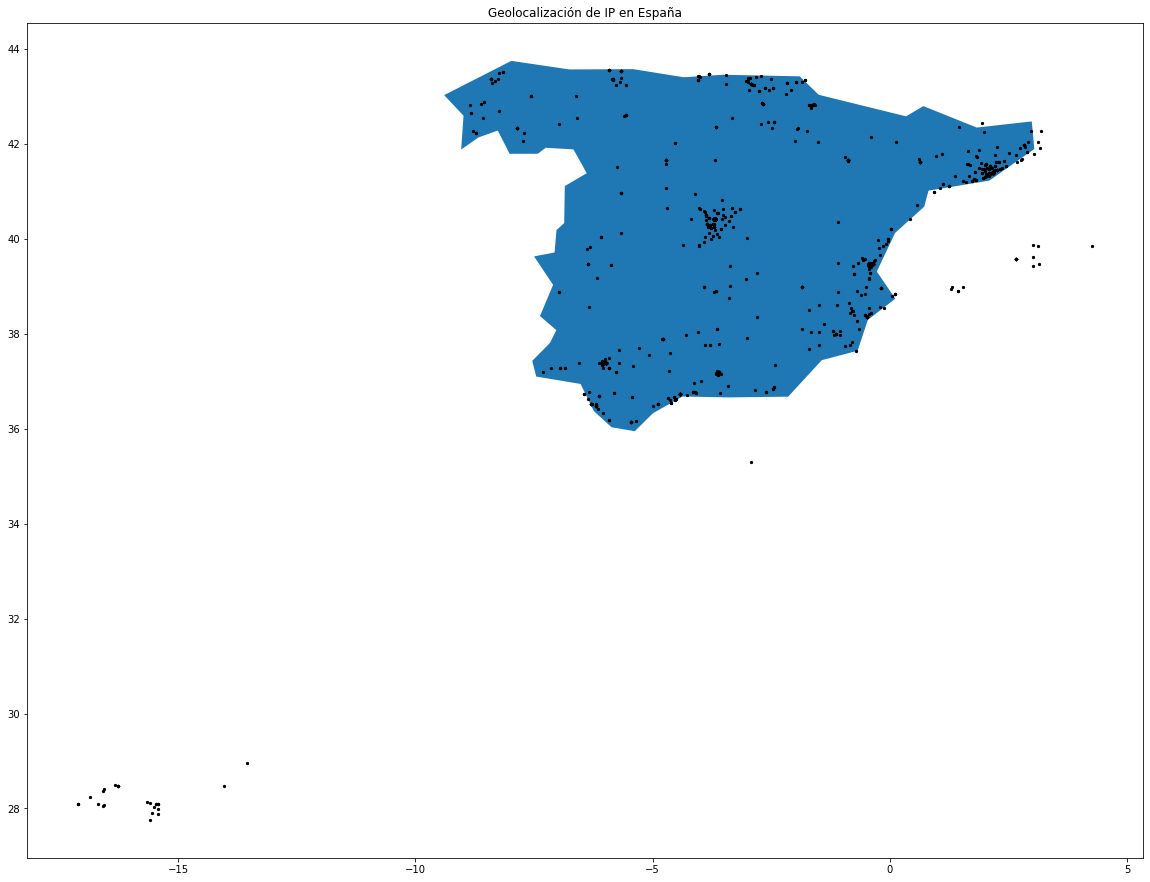

In [33]:
geometry = [Point(xy) for xy in zip(espana['Longitud'], espana['Latitud'])]
gdf = GeoDataFrame(espana, geometry=geometry) 

#Gráfico de España
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
spain = world.query('name == "Spain"')

gdf.plot(ax=spain.plot(figsize=(20, 20)), 
         marker='o', color='black', markersize=5).set(title='Geolocalización de IP en España')

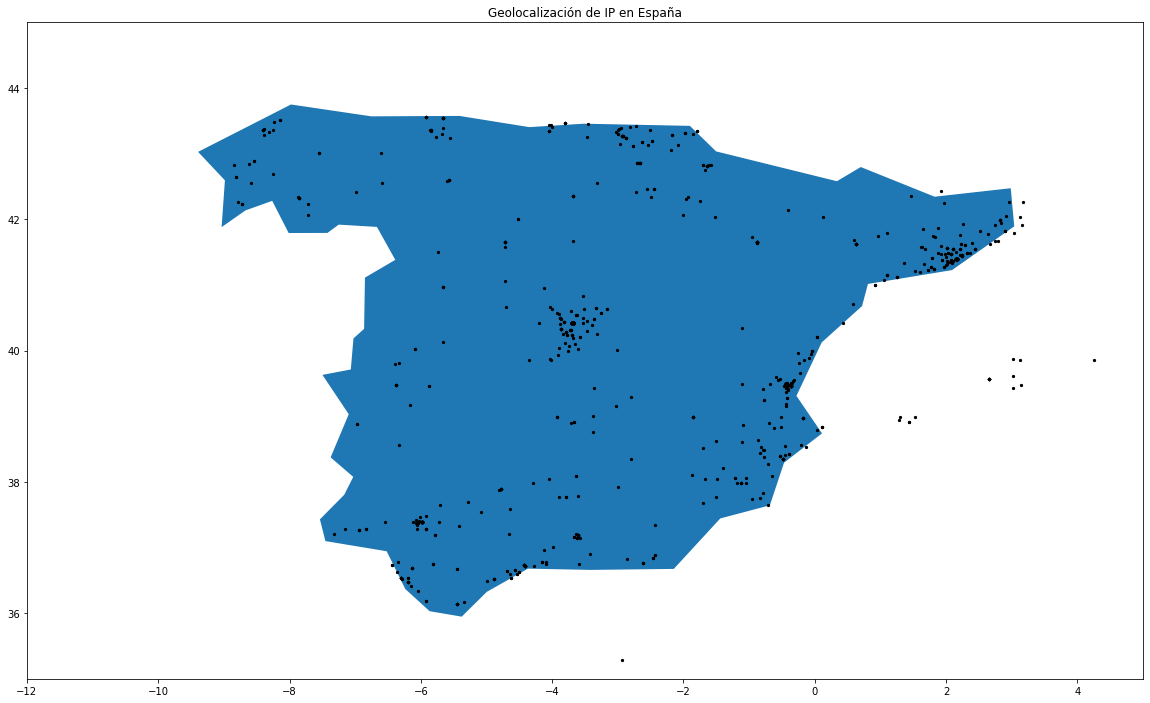

In [34]:
geometry = [Point(xy) for xy in zip(espana['Longitud'], espana['Latitud'])]
gdf = GeoDataFrame(espana, geometry=geometry) 

#Gráfico de España
gdf.plot(ax=spain.plot(figsize=(20, 20)), 
         marker='o', color='black', markersize=5).set(title='Geolocalización de IP en España')

plt.ylim(35,45)
plt.xlim(-12, 5)

plt.show()

Vemos que hay una concentración importantes de registros en la zona de Catalunya, en particular Barcelona. El resto de los registros paracen distribuidos con relativa uniformidad en relación al tamaño y población de los luagres.

PROBlEMAS CON EL MAPA (que no logré resolver): en el primer mapa no aparecen las Islas Canarias (aunque si su geolocalización, naturalmente) y hay geolocalizaciones al este del mapa que no se que significan)

In [61]:
ciudades = espana.groupby('Ciudad')


ciudades['N. entradas'].agg(np.sum).sort_values(ascending=False).head(20)


Ciudad
Torrejón de Ardoz         14725
Madrid                    14314
Barcelona                 10871
Seville                   10194
Valencia                   6638
Mislata                    3485
Zaragoza                   2533
Cadiz                      2427
Málaga                     1779
Marbella                   1650
Palma                      1231
Granada                    1194
Huelva                     1080
Algeciras                  1013
Castelló de la Plana        996
Ibiza Town                  943
Santa Cruz de Tenerife      934
Torre del Mar               897
Mostoles                    872
San Fernando                868
Name: N. entradas, dtype: int64

Viendo los número nominales no condice mucho con las conclusiones sacadas del mapa

**Conclusiones**
El mapa sirve para ver de una forma diferente que los números o los gráficos. Es interesante seguir explorando esa relación entre unos y otros